In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Load the dataset
data = pd.read_csv('drive/My Drive/CSC 547/titanic.csv')

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Preprocess the data
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) #drop columns that are not usefull

data['Age'] = data['Age'].fillna(data['Age'].median()) #fill null values using median value

In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked']) #convert text data to numerical format. to_categorical() can only handle numeric values


In [8]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X = data.drop(['Survived'], axis=1).values
y = data['Survived'].values

In [10]:
X.shape

(891, 10)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [12]:
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)


## Validation data

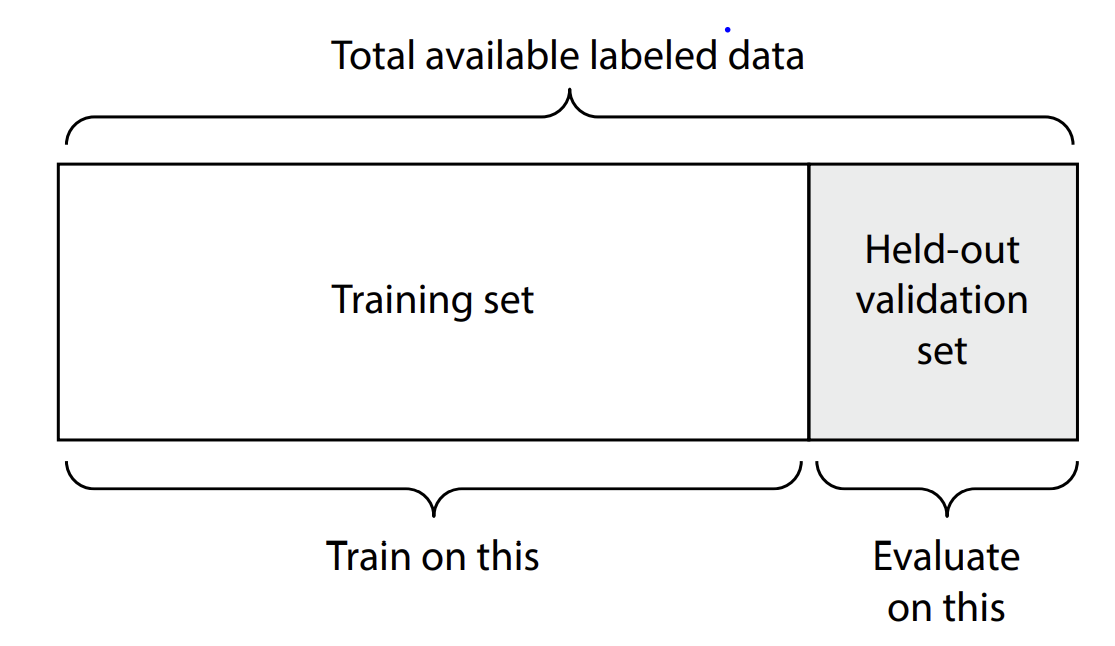

if little data is available, then your validation and test sets may contain too few samples to be statistically representative of the data at hand.

K-fold validation is a way to address this.<br>
By using the k-fold cross-validation method, we can evaluate the performance of a model on different subsets of the data and obtain a more reliable estimate of its performance.

In [35]:
# Define the K-fold cross-validation parameters
num_folds = 3
kfold = KFold(n_splits=num_folds, shuffle=True) #initialize a KFold cross-validation object
#shuffle=True option randomizes the order of the data before splitting it into folds

In [36]:
# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [46]:
# Train and evaluate the model using K-fold cross-validation
#you just look at your models and select the best performing approach using the validation data (=validation)
acc = []
loss = []
for train_index, test_index in kfold.split(X_train):
    model = create_model()
    model.fit(X_train[train_index], y_train[train_index], epochs=5, batch_size=16, verbose=0)
    score = model.evaluate(X[test_index], y[test_index], verbose=0)
    print(score)
    acc.append(score[1])
    loss.append(score[0])

[0.6494635939598083, 0.6638655662536621]
[0.671506404876709, 0.6751055121421814]
[1.2384788990020752, 0.6413502097129822]


In [48]:
print("Mean accuracy: %.2f%% " %(np.mean(acc)*100))
print("Mean loss: %.2f%%" %(np.mean(loss)*100))

Mean accuracy: 66.01% 
Mean loss: 85.31%


In [ ]:
# fit model on entire training data
model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=0)

In [49]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

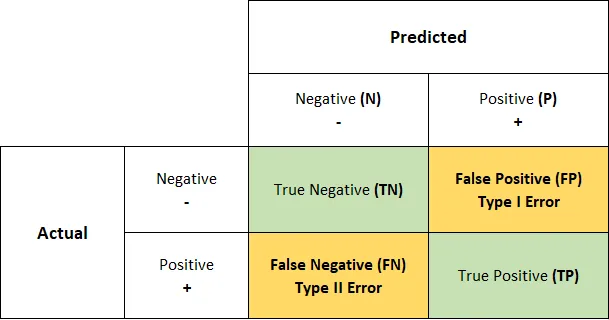

True Positives (TP): when the actual value is Positive and predicted is also Positive. <br>
True negatives (TN): when the actual value is Negative and prediction is also Negative. <br>
False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error<br>
False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

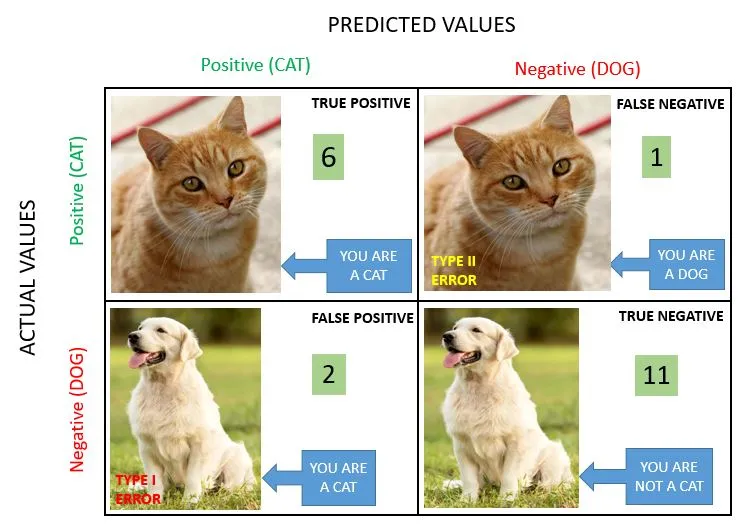

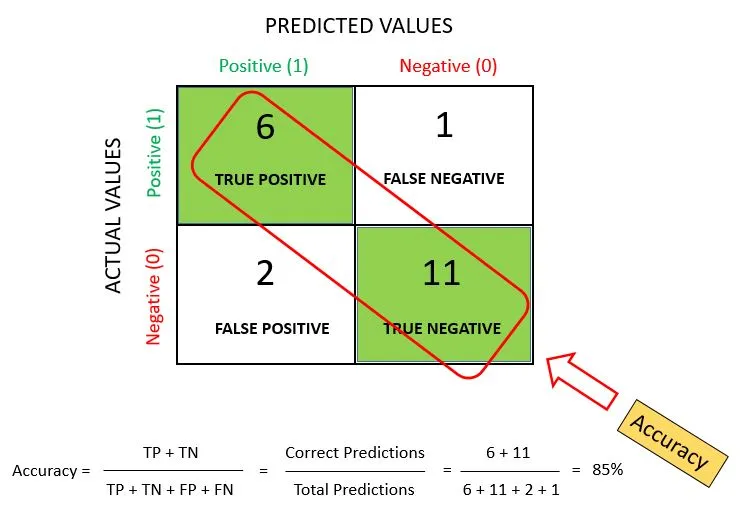

**Precision:** tells us how many predictions are actually positive out of all the total positive predicted.<br>
Precision is a useful metric in cases where False Positive is a higher concern than False Negatives. Ex: Spam Detection

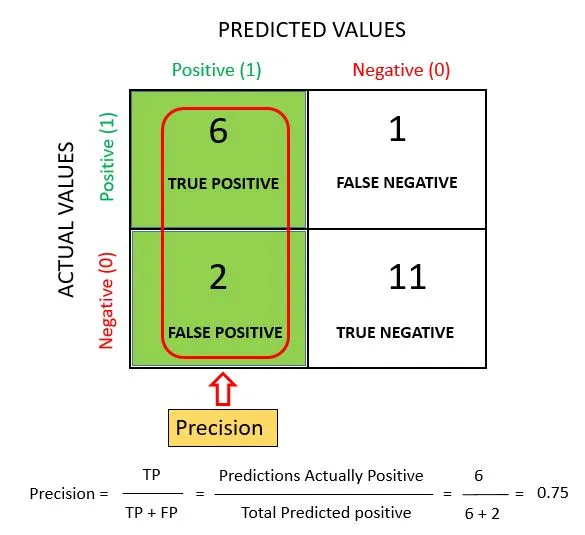

**Recall:**  how many observations of positive class are actually predicted as positive. <br>
Recall is a useful metric in cases where False Negative is more important than False Positive. Ex: person is is suffering from cancer but model predicted as not suffering from cancer. Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected

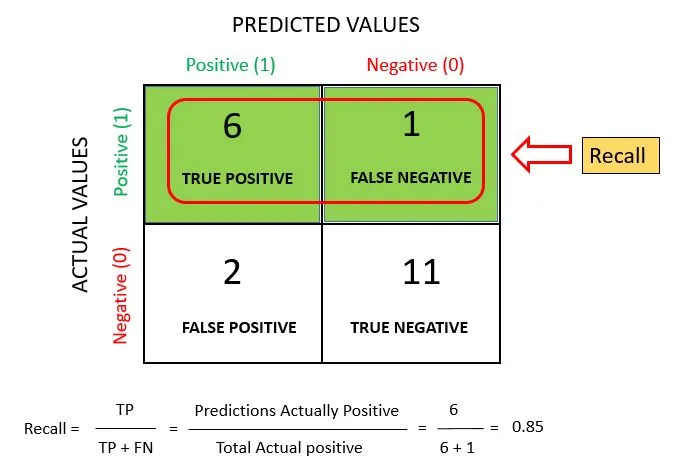

**F1 score:** is a number between 0 and 1 and is the harmonic mean of precision and recall. When we try to increase the precision of our model, the recall goes down and vice-versa. The F1-score captures both the trends in a single value.<br>
F1 score is a harmonic mean of Precision and Recall. As compared to Arithmetic Mean, Harmonic Mean punishes the extreme values more. F-score should be high(ideally 1).

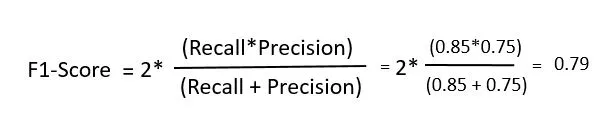

**Classification accuracy is not a reliable metric when dealing with imbalanced classes**, as it can be misleading. For instance, in a dataset of 100 patients with only 5 having diabetes and 95 being healthy, a model that always predicts the majority class as healthy would achieve an accuracy of 95%, even though it fails to detect the minority class.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

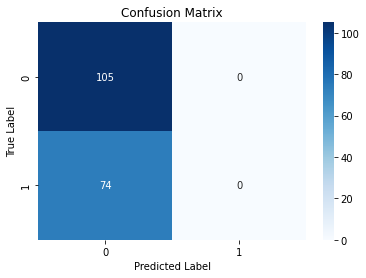

In [61]:
# plot the confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
z